In [1]:
import os
from imageio import imread
from matplotlib import pyplot as plt

from intelligent_placer_lib.preprocessing import get_template_mask, preprocess_all_images, preprocess_image
from intelligent_placer_lib.detection import detect_objects, detect_polygon
from intelligent_placer_lib.intelligent_placer import check_image

TEST_DIR = 'input\\tests'
TEMPLATE_DIR = 'input\\objects'
template_names = os.listdir(TEMPLATE_DIR)[:-1]
input_names = os.listdir(TEST_DIR)[:-1]

## Найдем маски для используемых предметов

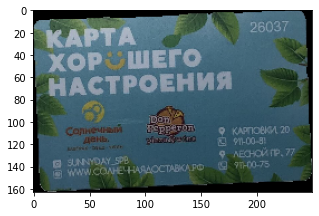

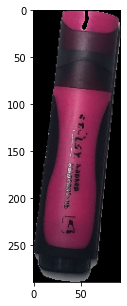

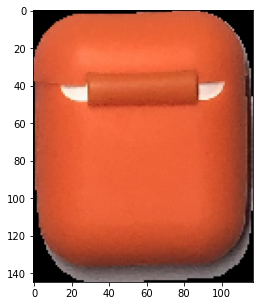

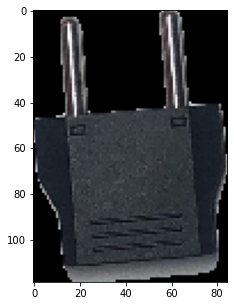

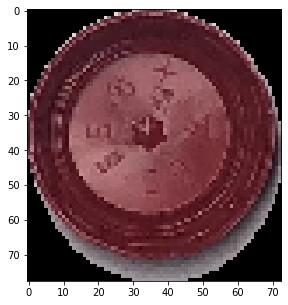

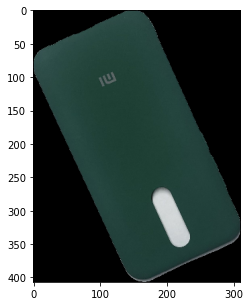

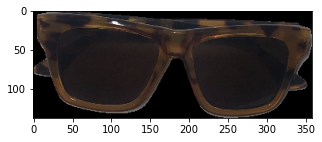

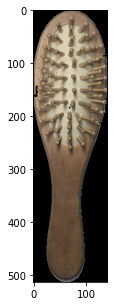

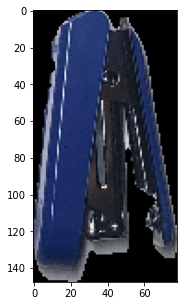

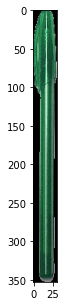

In [3]:
for name in template_names:
    get_template_mask(name)

## Определим, где на изображении находятся предметы, а где многоугольник

46


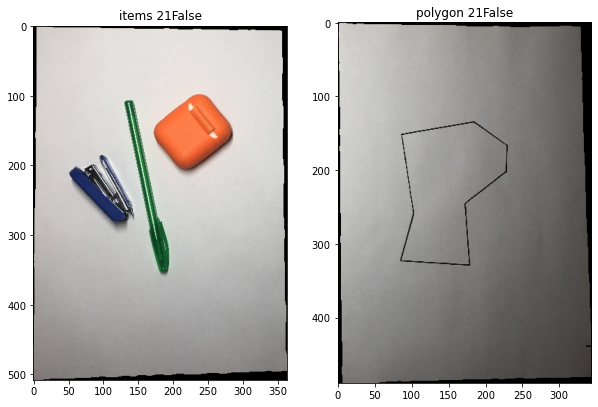

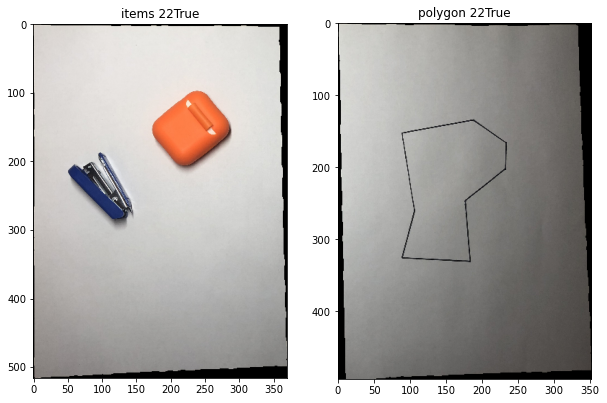

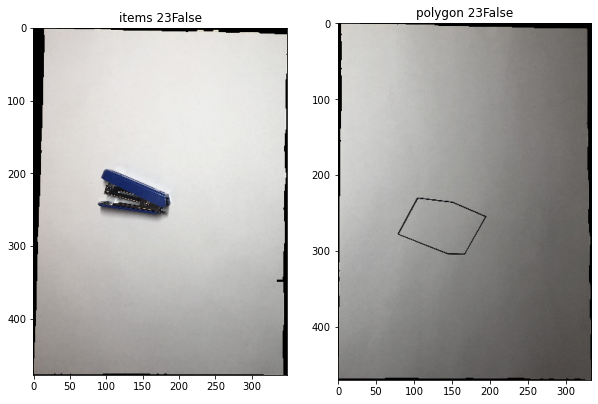

In [2]:
for name in input_names[20:23]:
    preprocess_all_images(name)

print(len(input_names))

## Сегментируем входное изображение

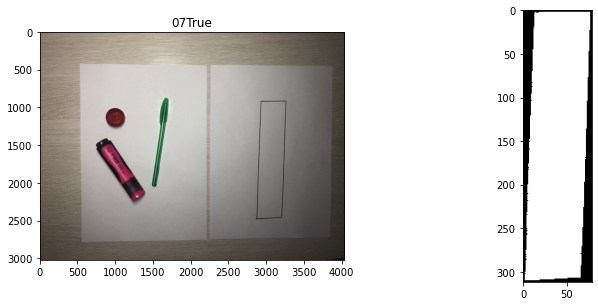

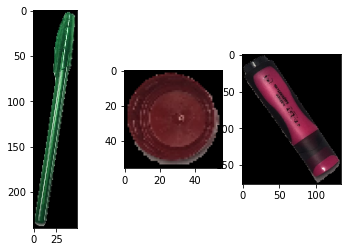

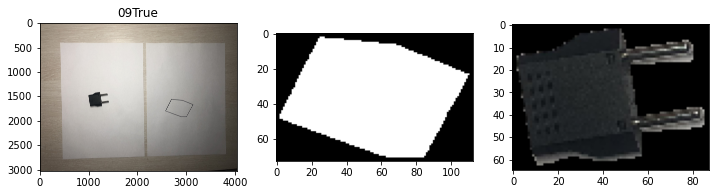

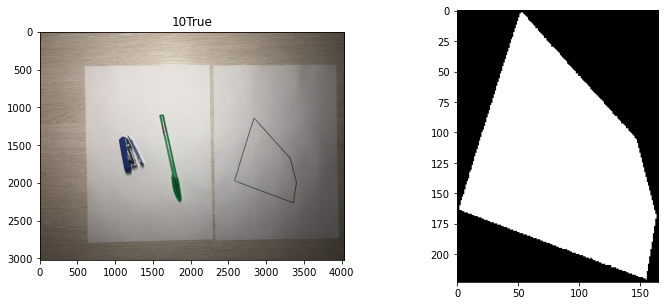

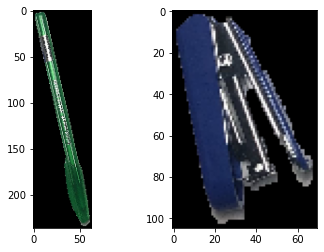

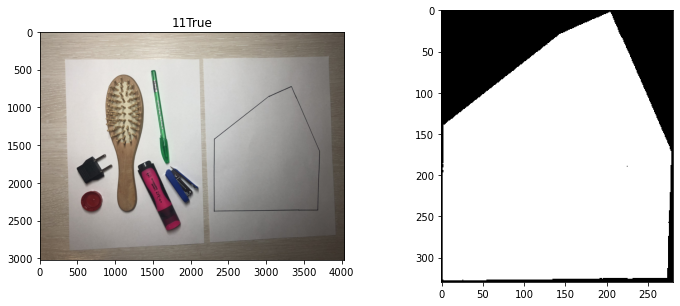

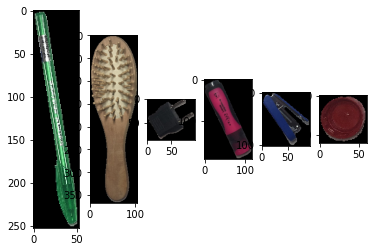

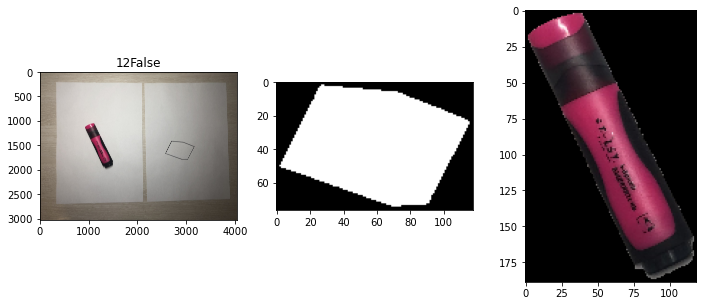

In [5]:
for name in input_names[5:10]:
    input_path = os.path.join(TEST_DIR, name)
    input_img = imread(input_path)

    sheets_list = preprocess_image(input_img)

    for sheet in sheets_list:
        if sheet['object(s)'] == 'polygon':
            polygon = detect_polygon(sheet['masked'])
        else:
            items_list = detect_objects(sheet)

    num_of_items = len(items_list)
    if num_of_items == 1:
        fig, ax = plt.subplots(1, 3, figsize=(12, 5))
        ax[0].imshow(input_img)
        ax[0].set_title(name[:-5])
        ax[1].imshow(polygon, cmap='gray')
        ax[2].imshow(items_list[0]['masked'])
    else:
        fig1, ax1 = plt.subplots(1, 2, figsize=(12, 5))
        ax1[0].imshow(input_img)
        ax1[0].set_title(name[:-5])
        ax1[1].imshow(polygon, cmap='gray')
        fig2, ax2 = plt.subplots(1, num_of_items)
        for i in range(num_of_items):
            ax2[i].imshow(items_list[i]['masked'])

02False - False
23False - False


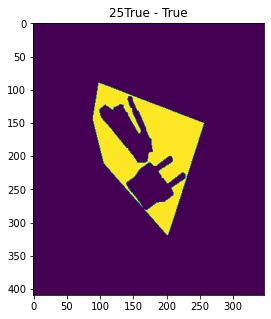

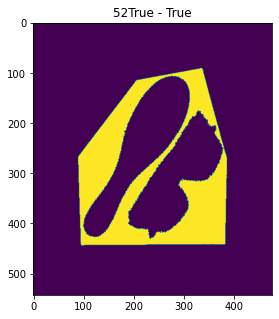

In [3]:
fast_inputs = ['02False.jpeg', '23False.jpeg', '25True.jpeg', '52True.jpeg']
for name in fast_inputs:
    answer, placement = check_image(name)

    if answer:
        fig, ax = plt.subplots(figsize=(5, 5))
        ax.imshow(placement)
        ax.set_title(name[:-5] + " - " + str(answer))
    else:
        print(name[:-5] + " - " + str(answer))